# Виклик: Аналіз тексту про науку про дані

> *У цьому блокноті ми експериментуємо з використанням різних URL - статті з Вікіпедії про машинне навчання. Ви можете побачити, що, на відміну від науки про дані, ця стаття містить багато термінів, що ускладнює аналіз. Нам потрібно придумати інший спосіб очищення даних після вилучення ключових слів, щоб позбутися деяких частих, але незначущих словосполучень.*

У цьому прикладі давайте виконаємо просту вправу, яка охоплює всі етапи традиційного процесу науки про дані. Вам не потрібно писати жодного коду, ви можете просто натиснути на комірки нижче, щоб виконати їх і спостерігати за результатом. Як виклик, вам пропонується спробувати цей код із різними даними.

## Мета

На цьому уроці ми обговорювали різні концепції, пов’язані з наукою про дані. Давайте спробуємо відкрити більше пов’язаних концепцій, виконуючи **текстовий аналіз**. Ми почнемо з тексту про науку про дані, вилучимо ключові слова з нього, а потім спробуємо візуалізувати результат.

Як текст я використаю сторінку про науку про дані з Вікіпедії:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Крок 1: Отримання даних

Перший крок у будь-якому процесі роботи з даними — це отримання даних. Ми будемо використовувати бібліотеку `requests` для цього:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Крок 2: Трансформація даних

Наступний крок — перетворення даних у форму, придатну для обробки. У нашому випадку ми завантажили вихідний код HTML зі сторінки, і тепер нам потрібно перетворити його у звичайний текст.

Існує багато способів зробити це. Ми скористаємося найпростішим вбудованим об'єктом [HTMLParser](https://docs.python.org/3/library/html.parser.html) з Python. Нам потрібно створити підклас класу `HTMLParser` і визначити код, який збиратиме весь текст всередині HTML-тегів, за винятком тегів `<script>` і `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Крок 3: Отримання інсайтів

Найважливіший крок — це перетворення наших даних у форму, з якої ми можемо отримати інсайти. У нашому випадку ми хочемо виділити ключові слова з тексту та визначити, які з них є найбільш значущими.

Ми будемо використовувати бібліотеку Python під назвою [RAKE](https://github.com/aneesha/RAKE) для виділення ключових слів. Спочатку встановимо цю бібліотеку, якщо вона ще не встановлена:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Основна функціональність доступна через об'єкт `Rake`, який ми можемо налаштувати за допомогою деяких параметрів. У нашому випадку ми встановимо мінімальну довжину ключового слова на 5 символів, мінімальну частоту ключового слова в документі на 3, а максимальну кількість слів у ключовому слові - на 2. Не соромтеся експериментувати з іншими значеннями та спостерігати за результатом.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Ми отримали список термінів разом із відповідним ступенем важливості. Як ви можете побачити, найбільш релевантні дисципліни, такі як машинне навчання та великі дані, знаходяться у верхніх позиціях списку.

## Крок 4: Візуалізація результату

Люди найкраще сприймають дані у візуальній формі. Тому часто має сенс візуалізувати дані, щоб отримати певні висновки. Ми можемо використати бібліотеку `matplotlib` у Python, щоб побудувати простий розподіл ключових слів із їхньою релевантністю:


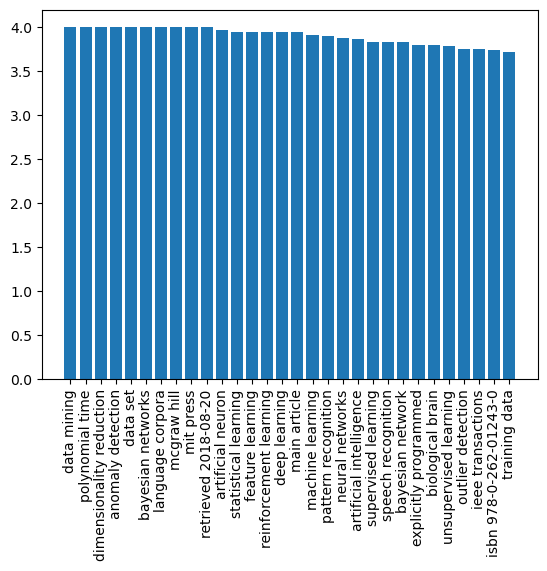

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Однак існує ще кращий спосіб візуалізувати частоти слів - використання **Хмари слів**. Нам потрібно буде встановити ще одну бібліотеку, щоб побудувати хмару слів із нашого списку ключових слів.


In [71]:
!{sys.executable} -m pip install wordcloud

`Об'єкт `WordCloud` відповідає за прийом або оригінального тексту, або попередньо обчисленого списку слів з їх частотами, і повертає зображення, яке потім можна відобразити за допомогою `matplotlib`:`


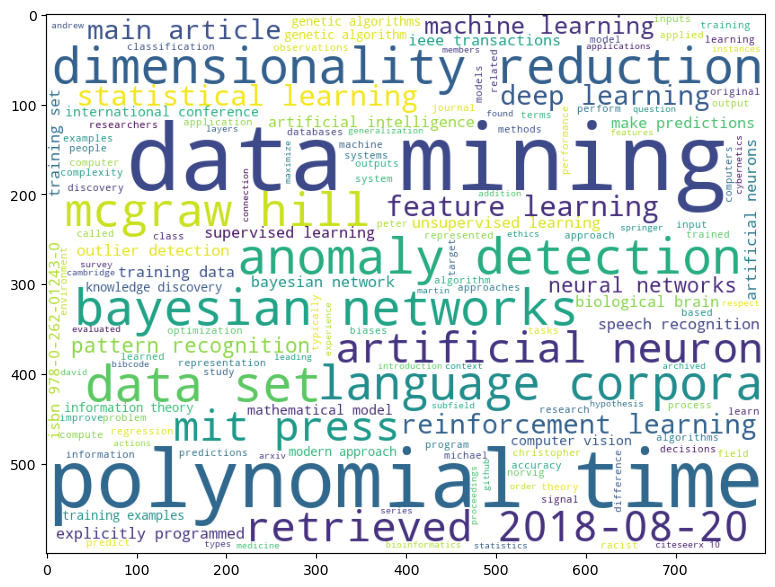

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Ми також можемо передати оригінальний текст до `WordCloud` - давайте подивимося, чи зможемо ми отримати подібний результат:


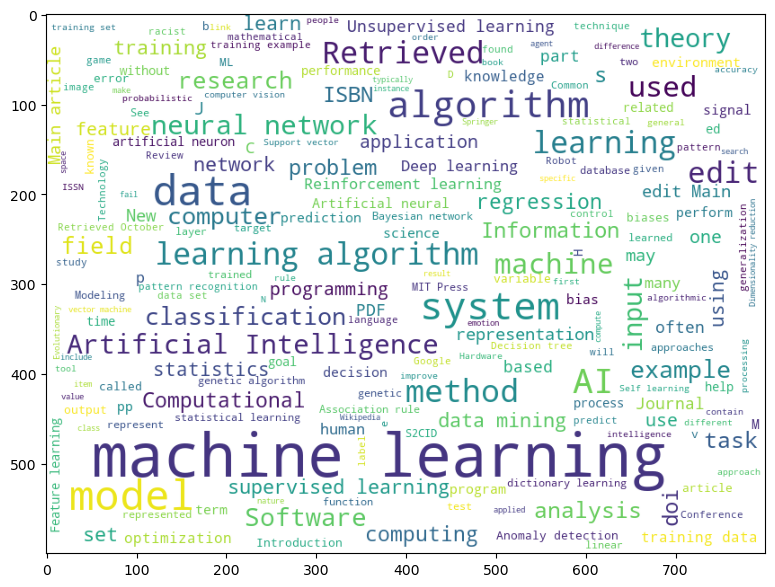

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Ви можете побачити, що хмарка слів тепер виглядає більш вражаюче, але вона також містить багато шуму (наприклад, нерелевантні слова, такі як `Retrieved on`). Також ми отримуємо менше ключових слів, що складаються з двох слів, таких як *data scientist* або *computer science*. Це тому, що алгоритм RAKE набагато краще справляється з вибором якісних ключових слів із тексту. Цей приклад ілюструє важливість попередньої обробки та очищення даних, адже чітка картина в кінці дозволить нам приймати кращі рішення.

У цій вправі ми пройшли простий процес вилучення певного сенсу з тексту Вікіпедії у формі ключових слів і хмарки слів. Цей приклад досить простий, але він добре демонструє всі типові кроки, які виконує дата-сайєнтист під час роботи з даними, починаючи від отримання даних і закінчуючи візуалізацією.

У нашому курсі ми детально обговоримо всі ці кроки.



---

**Відмова від відповідальності**:  
Цей документ був перекладений за допомогою сервісу автоматичного перекладу [Co-op Translator](https://github.com/Azure/co-op-translator). Хоча ми прагнемо до точності, будь ласка, майте на увазі, що автоматичні переклади можуть містити помилки або неточності. Оригінальний документ на його рідній мові слід вважати авторитетним джерелом. Для критичної інформації рекомендується професійний людський переклад. Ми не несемо відповідальності за будь-які непорозуміння або неправильні тлумачення, що виникають внаслідок використання цього перекладу.
